In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-RFA-range_G3_5-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,Pstatus,studytime,failures,schoolsup,paid,higher,romantic,famrel,Dalc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G3
0,1,1,18,1,0,2,0,1,0,1,0,4,1,3,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,3
1,1,1,17,1,1,2,0,0,0,1,0,5,1,3,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,3
2,1,1,15,1,1,2,0,1,0,1,0,4,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,3
3,1,1,15,1,1,3,0,0,0,1,1,3,1,5,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,4
4,1,1,16,1,1,2,0,0,0,1,0,4,1,5,2,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,4


In [3]:
df_por.shape

(649, 33)

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression 

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.886230,5
1,3.616211,3
2,4.125977,5
3,3.364746,3
4,3.035156,3


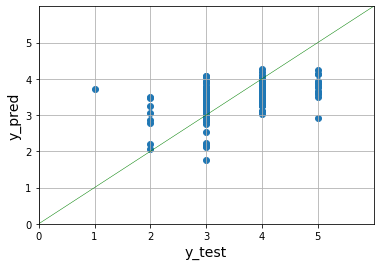

In [9]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [10]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [11]:
rmse(y_pred,y_test)

0.7105472877169895

## Decision Tree Regression

In [12]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [13]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [14]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
y_pred = grid_search_cv.predict(X_test)

In [16]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.564039,5
1,3.564039,3
2,3.564039,5
3,3.564039,3
4,3.564039,3


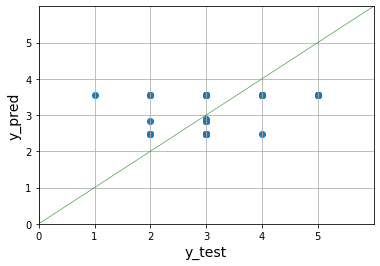

In [17]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [18]:
rmse(y_pred,y_test)

0.7395077278988104

## Random Forest Regression

In [19]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [20]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred = grid_search_cv.predict(X_test)

In [22]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.536710,5
1,3.522097,3
2,3.924866,5
3,3.317041,3
4,3.349354,3


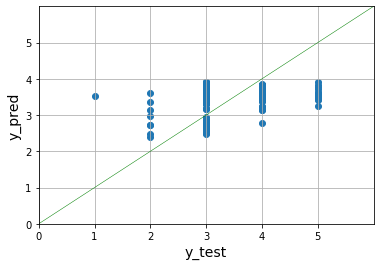

In [23]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [24]:
rmse(y_pred,y_test)

0.7230951322974383

## XGBoost 

In [25]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [26]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [27]:
y_pred = grid_search_cv.predict(X_test)

In [28]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.485154,5
1,3.486821,3
2,3.622827,5
3,3.420560,3
4,3.297237,3


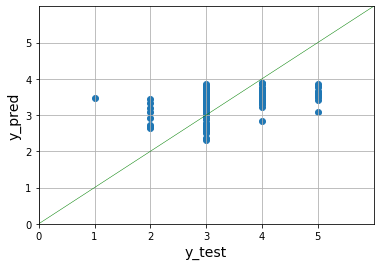

In [29]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [30]:
rmse(y_pred,y_test)

0.7156968934585118

## Neural Network 

In [31]:
sc = MinMaxScaler()

In [32]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(519, 32)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [36]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 64,epochs = 250)

Train on 519 samples, validate on 130 samples
Epoch 1/250
519/519 [==============================] - 1s 2ms/sample - loss: 8.9036 - val_loss: 7.4417
Epoch 2/250
519/519 [==============================] - 0s 102us/sample - loss: 5.5464 - val_loss: 3.4679
Epoch 3/250
519/519 [==============================] - 0s 77us/sample - loss: 3.0458 - val_loss: 0.7796
Epoch 4/250
519/519 [==============================] - 0s 81us/sample - loss: 2.7015 - val_loss: 0.6360
Epoch 5/250
519/519 [==============================] - 0s 71us/sample - loss: 2.2994 - val_loss: 1.2242
Epoch 6/250
519/519 [==============================] - 0s 73us/sample - loss: 2.0395 - val_loss: 1.5319
Epoch 7/250
519/519 [==============================] - 0s 67us/sample - loss: 2.2387 - val_loss: 1.1652
Epoch 8/250
519/519 [==============================] - 0s 66us/sample - loss: 1.8941 - val_loss: 0.9799
Epoch 9/250
519/519 [==============================] - 0s 64us/sample - loss: 1.9444 - val_loss: 0.9470
Epoch 10/250
519/5

519/519 [==============================] - 0s 64us/sample - loss: 0.8259 - val_loss: 0.7933
Epoch 79/250
519/519 [==============================] - 0s 66us/sample - loss: 0.8015 - val_loss: 0.7892
Epoch 80/250
519/519 [==============================] - 0s 66us/sample - loss: 0.7905 - val_loss: 0.8334
Epoch 81/250
519/519 [==============================] - 0s 66us/sample - loss: 0.7873 - val_loss: 0.8256
Epoch 82/250
519/519 [==============================] - 0s 67us/sample - loss: 0.8250 - val_loss: 0.8873
Epoch 83/250
519/519 [==============================] - 0s 73us/sample - loss: 0.7800 - val_loss: 0.8602
Epoch 84/250
519/519 [==============================] - 0s 71us/sample - loss: 0.8296 - val_loss: 0.8047
Epoch 85/250
519/519 [==============================] - 0s 67us/sample - loss: 0.8048 - val_loss: 0.7689
Epoch 86/250
519/519 [==============================] - 0s 67us/sample - loss: 0.7527 - val_loss: 0.8361
Epoch 87/250
519/519 [==============================] - 0s 66us/samp

519/519 [==============================] - 0s 66us/sample - loss: 0.6392 - val_loss: 0.6309
Epoch 156/250
519/519 [==============================] - 0s 67us/sample - loss: 0.5966 - val_loss: 0.6690
Epoch 157/250
519/519 [==============================] - 0s 69us/sample - loss: 0.6101 - val_loss: 0.5830
Epoch 158/250
519/519 [==============================] - 0s 62us/sample - loss: 0.5952 - val_loss: 0.6382
Epoch 159/250
519/519 [==============================] - 0s 67us/sample - loss: 0.6257 - val_loss: 0.6627
Epoch 160/250
519/519 [==============================] - 0s 67us/sample - loss: 0.6134 - val_loss: 0.6026
Epoch 161/250
519/519 [==============================] - 0s 64us/sample - loss: 0.6153 - val_loss: 0.5865
Epoch 162/250
519/519 [==============================] - 0s 66us/sample - loss: 0.6415 - val_loss: 0.6152
Epoch 163/250
519/519 [==============================] - 0s 67us/sample - loss: 0.6434 - val_loss: 0.5979
Epoch 164/250
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 65us/sample - loss: 0.5440 - val_loss: 0.6406
Epoch 233/250
519/519 [==============================] - 0s 67us/sample - loss: 0.5545 - val_loss: 0.5532
Epoch 234/250
519/519 [==============================] - 0s 67us/sample - loss: 0.5205 - val_loss: 0.5811
Epoch 235/250
519/519 [==============================] - 0s 64us/sample - loss: 0.5284 - val_loss: 0.5950
Epoch 236/250
519/519 [==============================] - 0s 64us/sample - loss: 0.4966 - val_loss: 0.6127
Epoch 237/250
519/519 [==============================] - 0s 66us/sample - loss: 0.4951 - val_loss: 0.5997
Epoch 238/250
519/519 [==============================] - 0s 64us/sample - loss: 0.4944 - val_loss: 0.5825
Epoch 239/250
519/519 [==============================] - 0s 62us/sample - loss: 0.5245 - val_loss: 0.6026
Epoch 240/250
519/519 [==============================] - 0s 66us/sample - loss: 0.5117 - val_loss: 0.5830
Epoch 241/250
519/519 [==============================] - 0s 

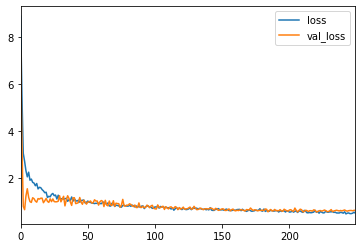

In [37]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.461435,5
1,2.846671,3
2,3.782087,5
3,3.075646,3
4,2.763461,3


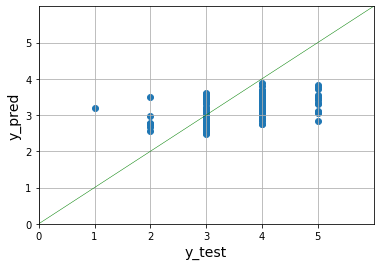

In [40]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [41]:
rmse(y_pred,y_test)

0.7816301340323177

## Stacking 

In [42]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [43]:
model = DecisionTreeRegressor(min_samples_leaf = 20,max_depth = 10)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [44]:
model = RandomForestRegressor(min_samples_leaf = 1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [45]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [46]:
model = Sequential()

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 64,epochs = 250)

Train on 519 samples, validate on 259 samples
Epoch 1/250
519/519 [==============================] - 1s 2ms/sample - loss: 9.3514 - val_loss: 7.2345
Epoch 2/250
519/519 [==============================] - 0s 77us/sample - loss: 6.0465 - val_loss: 3.5739
Epoch 3/250
519/519 [==============================] - 0s 73us/sample - loss: 2.9396 - val_loss: 1.1723
Epoch 4/250
519/519 [==============================] - 0s 81us/sample - loss: 2.7895 - val_loss: 1.0348
Epoch 5/250
519/519 [==============================] - 0s 77us/sample - loss: 2.4614 - val_loss: 1.2271
Epoch 6/250
519/519 [==============================] - 0s 79us/sample - loss: 2.0976 - val_loss: 1.5904
Epoch 7/250
519/519 [==============================] - 0s 100us/sample - loss: 2.0408 - val_loss: 1.0274
Epoch 8/250
519/519 [==============================] - 0s 75us/sample - loss: 2.0762 - val_loss: 0.8066
Epoch 9/250
519/519 [==============================] - 0s 69us/sample - loss: 1.9525 - val_loss: 1.0130
Epoch 10/250
519/5

519/519 [==============================] - 0s 73us/sample - loss: 0.7795 - val_loss: 0.5042
Epoch 79/250
519/519 [==============================] - 0s 69us/sample - loss: 0.7904 - val_loss: 0.4810
Epoch 80/250
519/519 [==============================] - 0s 67us/sample - loss: 0.8393 - val_loss: 0.5259
Epoch 81/250
519/519 [==============================] - 0s 69us/sample - loss: 0.8072 - val_loss: 0.5370
Epoch 82/250
519/519 [==============================] - 0s 71us/sample - loss: 0.7214 - val_loss: 0.5375
Epoch 83/250
519/519 [==============================] - 0s 71us/sample - loss: 0.7659 - val_loss: 0.5595
Epoch 84/250
519/519 [==============================] - 0s 69us/sample - loss: 0.8161 - val_loss: 0.5191
Epoch 85/250
519/519 [==============================] - 0s 74us/sample - loss: 0.8021 - val_loss: 0.4716
Epoch 86/250
519/519 [==============================] - 0s 89us/sample - loss: 0.7861 - val_loss: 0.5337
Epoch 87/250
519/519 [==============================] - 0s 71us/samp

519/519 [==============================] - 0s 69us/sample - loss: 0.6446 - val_loss: 0.3991
Epoch 156/250
519/519 [==============================] - 0s 71us/sample - loss: 0.6577 - val_loss: 0.3955
Epoch 157/250
519/519 [==============================] - 0s 79us/sample - loss: 0.6495 - val_loss: 0.4292
Epoch 158/250
519/519 [==============================] - 0s 73us/sample - loss: 0.6786 - val_loss: 0.3859
Epoch 159/250
519/519 [==============================] - 0s 79us/sample - loss: 0.6340 - val_loss: 0.3927
Epoch 160/250
519/519 [==============================] - 0s 69us/sample - loss: 0.6293 - val_loss: 0.4307
Epoch 161/250
519/519 [==============================] - 0s 75us/sample - loss: 0.6315 - val_loss: 0.3923
Epoch 162/250
519/519 [==============================] - 0s 73us/sample - loss: 0.6450 - val_loss: 0.3881
Epoch 163/250
519/519 [==============================] - 0s 83us/sample - loss: 0.7019 - val_loss: 0.4009
Epoch 164/250
519/519 [==============================] - 0s 

519/519 [==============================] - 0s 73us/sample - loss: 0.4997 - val_loss: 0.3551
Epoch 233/250
519/519 [==============================] - 0s 75us/sample - loss: 0.5119 - val_loss: 0.3290
Epoch 234/250
519/519 [==============================] - 0s 71us/sample - loss: 0.5526 - val_loss: 0.3266
Epoch 235/250
519/519 [==============================] - 0s 71us/sample - loss: 0.5205 - val_loss: 0.3196
Epoch 236/250
519/519 [==============================] - 0s 77us/sample - loss: 0.5667 - val_loss: 0.3206
Epoch 237/250
519/519 [==============================] - 0s 71us/sample - loss: 0.5022 - val_loss: 0.3192
Epoch 238/250
519/519 [==============================] - 0s 79us/sample - loss: 0.5341 - val_loss: 0.3378
Epoch 239/250
519/519 [==============================] - 0s 73us/sample - loss: 0.5587 - val_loss: 0.3234
Epoch 240/250
519/519 [==============================] - 0s 77us/sample - loss: 0.5141 - val_loss: 0.3113
Epoch 241/250
519/519 [==============================] - 0s 

In [47]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [48]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,2.260870,2.63,2.690458,2.450931
1,3.636364,3.47,3.548483,3.061749
2,2.260870,2.52,2.572711,2.426889
3,3.800000,3.78,3.751043,3.538542
4,3.950000,3.65,3.675618,3.572550


In [49]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,3.324324,3.54,3.537777,3.684217
1,2.900000,3.45,3.327213,3.270868
2,3.324324,3.68,3.559557,4.217786
3,3.324324,3.50,3.559557,3.319646
4,2.900000,3.04,3.190569,3.201522


### Meta Model 

In [50]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [51]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,4.200414,5
1,3.491224,3
2,5.180580,5
3,3.507408,3
4,3.482446,3


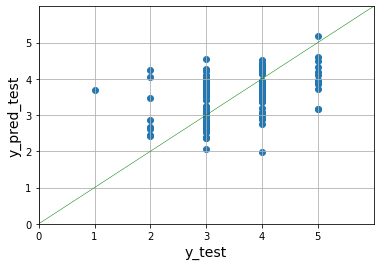

In [52]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [53]:
rmse(y_pred_test,y_test)

0.7889063677278406

In [54]:
mean_absolute_error(y_pred_test,y_test)

0.6235105165503105